In [8]:
import pandas as pd
import numpy as np
import seaborn as sns
from sklearn import preprocessing
from sklearn.model_selection import train_test_split
!pip install --upgrade gensim
from gensim.models import Word2Vec

     ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 24.0/24.0 MB 52.1 MB/s eta 0:00:00
You should consider upgrading via the '/root/venv/bin/python -m pip install --upgrade pip' command.


In [24]:
import gensim

In [9]:
df = pd.read_csv('pet_supplies.csv')
df.head()

/shared-libs/python3.9/py-core/lib/python3.9/site-packages/IPython/core/interactiveshell.py:3139: DtypeWarning: Columns (1) have mixed types.Specify dtype option on import or set low_memory=False.
  has_raised = await self.run_ast_nodes(code_ast.body, cell_name,


,overall,vote,verified,reviewTime,reviewerID,asin,reviewerName,reviewText,summary,unixReviewTime,style,image
0,3.0,2,True,"12 2, 2016",A2KN4FJVI2TZSF,0972585419,M.G.,I purchased this cd for my Pocket Parrot. It h...,It's okay,1480636800,NaN,NaN
1,3.0,NaN,True,"10 17, 2016",A3RMA1DD66JDRV,0972585419,Susan P.,"Maybe it's just my Amazon parrot, but she's no...",It might work for a different bird,1476662400,NaN,NaN
2,5.0,2,True,"09 9, 2016",AAANYRIEOIT3R,0972585419,Luggie Lugnut,I bought this to help me teach my blue quaker ...,I bought this to help me teach my blue quaker ...,1473379200,NaN,NaN
3,3.0,NaN,True,"08 31, 2016",A3W44VX0LXAOHU,0972585419,Melissa Partin,Bird showed no interest in it....,Three Stars,1472601600,NaN,NaN
4,2.0,NaN,True,"08 18, 2016",A16ZDBZGKYDRSU,0972585419,Cheryle Bell,Didn't do a thing for my African Grey! He hate...,He hated it and it was very obnoxious,1471478400,NaN,NaN


In [10]:
df = df[['overall', 'reviewerID', 'asin']]
df

,overall,reviewerID,asin
0,3.0,A2KN4FJVI2TZSF,0972585419
1,3.0,A3RMA1DD66JDRV,0972585419
2,5.0,AAANYRIEOIT3R,0972585419
3,3.0,A3W44VX0LXAOHU,0972585419
4,2.0,A16ZDBZGKYDRSU,0972585419
...,...,...,...
2098320,4.0,A2BWOAJ5KSAL4C,B01HIQ9NGU
2098321,4.0,A1X0IOOF3J0OXB,B01HIV7FC4
2098322,5.0,A3UCIDW3BYEGB1,B01HIV7FC4
2098323,4.0,A2JO0GAAKLQ0SH,B01HIV7FC4


In [13]:
reviewers = list(df["reviewerID"].unique())
reviewers

['A2KN4FJVI2TZSF',
 'A3RMA1DD66JDRV',
 'AAANYRIEOIT3R',
 'A3W44VX0LXAOHU',
 'A16ZDBZGKYDRSU',
 'A20M3TKXKB1M1T',
 'A2C26KQVC1SMHZ',
 'A1SR90QMEF7G5D',
 'A39RBE0IAAUCYN',
 'ALF0MRD3LRTPN',
 'A3DQ9Q7AE4JVO8',
 'AN4BBV6PR8L1Q',
 'A29BY9ABO4FDEZ',
 'A12IOCD2A7OC7K',
 'A112XLN4J4TYLR',
 'A1GQ3XWRU254NM',
 'AK0VAHHIIZARE',
 'A8GIK2FIUKVDG',
 'A14CK12J7C7JRK',
 'A1SRMG16HF5TLD',
 'A2Y4N3218KEKH7',
 'ACUBDGRCAFQCA',
 'A2CR37UY3VR7BN',
 'A2UBQA85NIGLHA',
 'A1QR5VWI7B1F4N',
 'A2A4COGL9VW2HY',
 'AF3EVH5OFWIQN',
 'AQUHJVX6O882V',
 'A2YPQ9TO5HXMLR',
 'AJCABNFNI4ITJ',
 'A3ULT5YS76UUT8',
 'ASPER0KSPHISK',
 'AMJE54CQVZW2U',
 'A1IORHHS426USN',
 'A1CPR5JFBUAO9D',
 'A3SCCFRL2KC5PL',
 'A1WOOTNIQW8QEW',
 'A9CPMJ116JD74',
 'AEQ85LW0EB3QU',
 'A2GCE5241RXOHZ',
 'A2IP6FLGNRQTHH',
 'AYBY14GE3DKS2',
 'AECRKP52919WB',
 'A2UX7M4R0CTVWV',
 'AFOC5B82JK42N',
 'AC2278WPK3EU',
 'AQU3M75UF1QGO',
 'A1W97Q4N2K20VD',
 'A2MVU64P56WDMX',
 'A1SPTLN3AZWNFV',
 'ATJZFD6MJQZQW',
 'A3CY9DK7MHYFYR',
 'A3MX96YM4NT6HT',
 'AG6TX1ZJHLM

In [14]:
list(df["asin"])

['0972585419',
 '0972585419',
 '0972585419',
 '0972585419',
 '0972585419',
 '0972585419',
 '0972585419',
 '0972585419',
 '0972585419',
 '0972585419',
 '0972585419',
 '0972585419',
 '0972585419',
 '0972585419',
 '0972585419',
 '0972585419',
 '0978619404',
 '0978619404',
 '1223000893',
 '1223000893',
 '1223000893',
 '1223000893',
 '1223000893',
 '1223000893',
 '1223000893',
 '1223000893',
 '1300450991',
 '1300450991',
 '1300450991',
 '130045136X',
 '130045136X',
 '130045136X',
 '1417084871',
 '1417084871',
 '1417084871',
 '1417084871',
 '1417084871',
 '1417084871',
 '1417084871',
 '1417084871',
 '1417084871',
 '1417084871',
 '1417084871',
 '1417084871',
 '1417084871',
 '1417084871',
 '1417084871',
 '1417084871',
 '1417084871',
 '1417084871',
 '1417084871',
 '1417084871',
 '1417084871',
 '1417084871',
 '1417084871',
 '1417084871',
 '1417084871',
 '1417084871',
 '1417084871',
 '1417084871',
 '1440572828',
 '1440572828',
 '1440572828',
 '1440572828',
 '1440572828',
 '1440572828',
 '14405728

In [17]:
reviewers= reviewers[0:1000]
len(reviewers)

1000

In [18]:
sentences = []
for i in reviewers:
    aframe = df[df["reviewerID"]== i]
    sentences.append(list(aframe["asin"]))

In [31]:
sentences

[['0972585419',
  'B00028ZLDG',
  'B0002DH2WO',
  'B0002DGZ86',
  'B0002DK6W2',
  'B000790CP2',
  'B000BQN9LA',
  'B000F1TNJS',
  'B0017JBHMS',
  'B0017JBHMS',
  'B0018N1DRW',
  'B0025184RS',
  'B0051BGOJ4',
  'B005OJ8BXK',
  'B00A822MT2',
  'B00JW91Q7G',
  'B00K0JJNCC',
  'B00QBAJB7G',
  'B00X00GIYY'],
 ['0972585419',
  'B000O5DI3W',
  'B000OX89XI',
  'B00134FQZQ',
  'B00134FQZQ',
  'B001HI40FA',
  'B001OE6P6O',
  'B001OE6N8Y',
  'B002EO1OIW',
  'B005MQXNT2',
  'B009SPQ5S4',
  'B00AV5KQZ8',
  'B00E1XP8BS',
  'B00P60Z7XY',
  'B01CPO7JW0'],
 ['0972585419',
  'B0002ARQS2',
  'B0002FP3BY',
  'B0002FP328',
  'B0002VAZSY',
  'B000NHWMGU',
  'B0015ZMZFW',
  'B0015ZMZFW',
  'B00198OD64',
  'B00198RKEG',
  'B004ZM7JB2',
  'B007VOW0T2',
  'B009SXFK46',
  'B017CO97QO',
  'B0002FP32I',
  'B00063KG5A',
  'B000FPKZFU',
  'B000MB2E24',
  'B000MIU5HI',
  'B007PO45ZU',
  'B00C2O3PR2'],
 ['0972585419', 'B0067QQH3K', 'B00Q7YG9KS', 'B0171DP30U', 'B0002FP32I'],
 ['0972585419',
  'B0002FP422',
  'B000795ZE

In [30]:
model = Word2Vec(sentences, min_count=1)
# summarize the loaded model
print(model)
# summarize vocabulary
#words = list(model.wv.vocab)
#print(words)
# access vector for one word
#print(model['sentence'])

model.save('model.bin')
new_model = Word2Vec.load('model.bin')
print(new_model)

Word2Vec<vocab=6618, vector_size=100, alpha=0.025>
Word2Vec<vocab=6618, vector_size=100, alpha=0.025>


In [33]:
from sklearn.decomposition import PCA
from matplotlib import pyplot



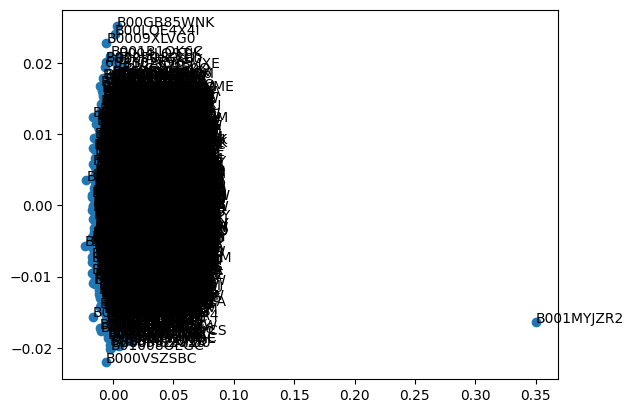

In [38]:
model = Word2Vec(sentences, min_count=1)
X = model.wv[model.wv.index_to_key]
pca = PCA(n_components=2)
result = pca.fit_transform(X)
# create a scatter plot of the projection
pyplot.scatter(result[:, 0], result[:, 1])
words = list(model.wv.index_to_key)
for i, word in enumerate(words):
    pyplot.annotate(word, xy=(result[i, 0], result[i, 1]))
pyplot.show()

In [40]:
model.wv.most_similar(positive=['0972585419'])

[('B002VU3Z7C', 0.36136043071746826),
 ('B004XZB0QQ', 0.33289068937301636),
 ('B00W18D4SO', 0.3269557058811188),
 ('B000XPCSAM', 0.3192768692970276),
 ('B007CUEBJ2', 0.31515204906463623),
 ('B001JBH0Q6', 0.30547213554382324),
 ('B0002AQX1S', 0.29631781578063965),
 ('B013I2AOUM', 0.29447054862976074),
 ('B00XR42U7M', 0.28819820284843445),
 ('B003ALQ9U6', 0.28819555044174194)]

<a style='text-decoration:none;line-height:16px;display:flex;color:#5B5B62;padding:10px;justify-content:end;' href='https://deepnote.com?utm_source=created-in-deepnote-cell&projectId=2d762e24-0c1d-4649-8cee-c6eba6949ae6' target="_blank">
 </img>
Created in <span style='font-weight:600;margin-left:4px;'>Deepnote</span></a>